In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv("clean_data.csv", low_memory = False, index_col = "Unnamed: 0")

In [3]:
# isolate the covid vaccine data
covid_df = data_df.loc[data_df["VAX_TYPE"] == "COVID19"]
covid_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,RECOVD,NUMDAYS,FORM_VERS,OFC_VISIT,ER_ED_VISIT,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES
211596,896636,11/14/2020,SC,47,F,NaN,NaN,NaN,NaN,NaN,...,N,4.0,2,Y,Y,tetracycline,11/14/2020,COVID19,MODERNA,UNK
214170,902418,12/15/2020,NJ,56,F,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,NaN,none,12/15/2020,COVID19,PFIZER\BIONTECH,1
214172,902440,12/15/2020,AZ,35,F,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,NaN,NaN,12/15/2020,COVID19,PFIZER\BIONTECH,1
214175,902446,12/15/2020,WV,55,F,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,NaN,"Contrast Dye IV contrast, shellfish, strawberry",12/15/2020,COVID19,PFIZER\BIONTECH,1
214183,902464,12/15/2020,LA,42,M,NaN,NaN,NaN,NaN,NaN,...,Y,0.0,2,NaN,Y,none,12/15/2020,COVID19,PFIZER\BIONTECH,UNK


In [4]:
data_df["VAX_TYPE"].value_counts()

COVID19    385931
VARZOS      50130
FLU3        42037
FLU4        21471
PPV         17049
            ...  
DTAPH           1
DTPHIB          1
PLAGUE          1
DTPHEP          1
DTPIHI          1
Name: VAX_TYPE, Length: 86, dtype: int64

In [5]:
# count female/male/undisclosed
covid_df["SEX"].value_counts()

F    277299
M    106451
U      2181
Name: SEX, dtype: int64

In [6]:
# separate data by gender
f_covid_df = covid_df.loc[covid_df["SEX"] == "F"]
m_covid_df = covid_df.loc[covid_df["SEX"] == "M"]

In [7]:
# count the types of outcome for F and M
outcomes_df = pd.DataFrame({
    "OFC_VISIT": [len(f_covid_df.loc[f_covid_df["OFC_VISIT"] == "Y"]), len(m_covid_df.loc[m_covid_df["OFC_VISIT"] == "Y"])],
    "ER_VISIT": [len(f_covid_df.loc[f_covid_df["ER_VISIT"] == "Y"]), len(m_covid_df.loc[m_covid_df["ER_VISIT"] == "Y"])],
    "HOSPITAL": [len(f_covid_df.loc[f_covid_df["HOSPITAL"] == "Y"]), len(m_covid_df.loc[m_covid_df["HOSPITAL"] == "Y"])],
    "L_THREAT": [len(f_covid_df.loc[f_covid_df["L_THREAT"] == "Y"]), len(m_covid_df.loc[m_covid_df["L_THREAT"] == "Y"])],
    "DIED": [len(f_covid_df.loc[f_covid_df["DIED"] == "Y"]), len(m_covid_df.loc[m_covid_df["DIED"] == "Y"])]
    
}).rename(index = {0: "F", 1: "M"}).transpose()

outcomes_df

,F,M
OFC_VISIT,57260,21173
ER_VISIT,36,16
HOSPITAL,11611,10187
L_THREAT,3591,2946
DIED,2114,2718


<AxesSubplot:>

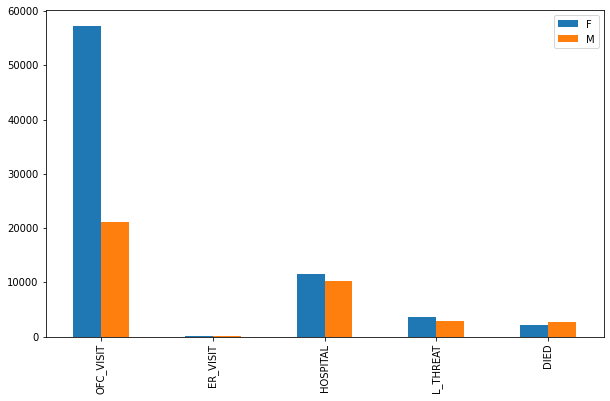

In [8]:
outcomes_df.plot(kind = "bar",
               figsize = (10, 6),
               
              )